In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "ebay_cleaned.csv"
ebay_df = pd.read_csv(file_path)

In [2]:
# Convert 'Item Creation Date' to datetime
ebay_df["Item Creation Date"] = pd.to_datetime(ebay_df["Item Creation Date"])

In [3]:
# Aggregate customer-level data
customer_data = ebay_df.groupby("Seller").agg(
    total_spent=("Price", "sum"),  # Total spending
    num_purchases=("Item ID", "count"),  # Number of purchases
    avg_order_value=("Price", "mean"),  # Average order value
    last_purchase=("Item Creation Date", "max"),  # Most recent purchase
    region=("Item Location", "first")  # First known location (simplified)
).reset_index()

In [4]:
# Display first few rows
display(customer_data.head())

,Seller,total_spent,num_purchases,avg_order_value,last_purchase,region
0,Unknown Seller,33512.39,75,446.831867,2025-03-15 23:46:35+00:00,951**
1,testuser_pa4_demo_1,51.00,1,51.000000,2025-03-04 04:23:55+00:00,******
2,testuser_pa4_demo_4,207.40,1,207.400000,2025-03-01 03:58:07+00:00,Unknown
3,testuser_pa4_demo_5,98.17,1,98.170000,2025-02-22 10:44:56+00:00,***
4,testuser_popdock,500.00,1,500.000000,2025-02-23 21:52:27+00:00,951**


# Clustering Customers (K-Means)

In [5]:
# Select features for clustering
features = customer_data[["total_spent", "num_purchases", "avg_order_value"]]

In [6]:
# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [7]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # 3 customer segments
customer_data["segment"] = kmeans.fit_predict(features_scaled)

In [8]:
# Display cluster results
display(customer_data.head())

,Seller,total_spent,num_purchases,avg_order_value,last_purchase,region,segment
0,Unknown Seller,33512.39,75,446.831867,2025-03-15 23:46:35+00:00,951**,1
1,testuser_pa4_demo_1,51.00,1,51.000000,2025-03-04 04:23:55+00:00,******,2
2,testuser_pa4_demo_4,207.40,1,207.400000,2025-03-01 03:58:07+00:00,Unknown,2
3,testuser_pa4_demo_5,98.17,1,98.170000,2025-02-22 10:44:56+00:00,***,2
4,testuser_popdock,500.00,1,500.000000,2025-02-23 21:52:27+00:00,951**,0


# Identifying High-Value Customers

In [9]:
# High-value customers (Top 10 spenders)
top_spenders = customer_data.sort_values(by="total_spent", ascending=False).head(10)

# High-frequency buyers (Top 10 by purchases)
top_buyers = customer_data.sort_values(by="num_purchases", ascending=False).head(10)

print("🔹 Top Spenders:")
display(top_spenders)

print("\n🔹 Top Buyers:")
display(top_buyers)

🔹 Top Spenders:


,Seller,total_spent,num_purchases,avg_order_value,last_purchase,region,segment
0,Unknown Seller,33512.39,75,446.831867,2025-03-15 23:46:35+00:00,951**,1
5,testuser_visualsoftstore,1000.00,2,500.000000,2025-03-03 10:08:43+00:00,951**,0
4,testuser_popdock,500.00,1,500.000000,2025-02-23 21:52:27+00:00,951**,0
6,testuser_vyapljrzekfm,500.00,1,500.000000,2025-03-05 11:14:22+00:00,951**,0
2,testuser_pa4_demo_4,207.40,1,207.400000,2025-03-01 03:58:07+00:00,Unknown,2
3,testuser_pa4_demo_5,98.17,1,98.170000,2025-02-22 10:44:56+00:00,***,2
1,testuser_pa4_demo_1,51.00,1,51.000000,2025-03-04 04:23:55+00:00,******,2



🔹 Top Buyers:


,Seller,total_spent,num_purchases,avg_order_value,last_purchase,region,segment
0,Unknown Seller,33512.39,75,446.831867,2025-03-15 23:46:35+00:00,951**,1
5,testuser_visualsoftstore,1000.00,2,500.000000,2025-03-03 10:08:43+00:00,951**,0
1,testuser_pa4_demo_1,51.00,1,51.000000,2025-03-04 04:23:55+00:00,******,2
2,testuser_pa4_demo_4,207.40,1,207.400000,2025-03-01 03:58:07+00:00,Unknown,2
3,testuser_pa4_demo_5,98.17,1,98.170000,2025-02-22 10:44:56+00:00,***,2
4,testuser_popdock,500.00,1,500.000000,2025-02-23 21:52:27+00:00,951**,0
6,testuser_vyapljrzekfm,500.00,1,500.000000,2025-03-05 11:14:22+00:00,951**,0


# Scatter Plot: Customer Segments

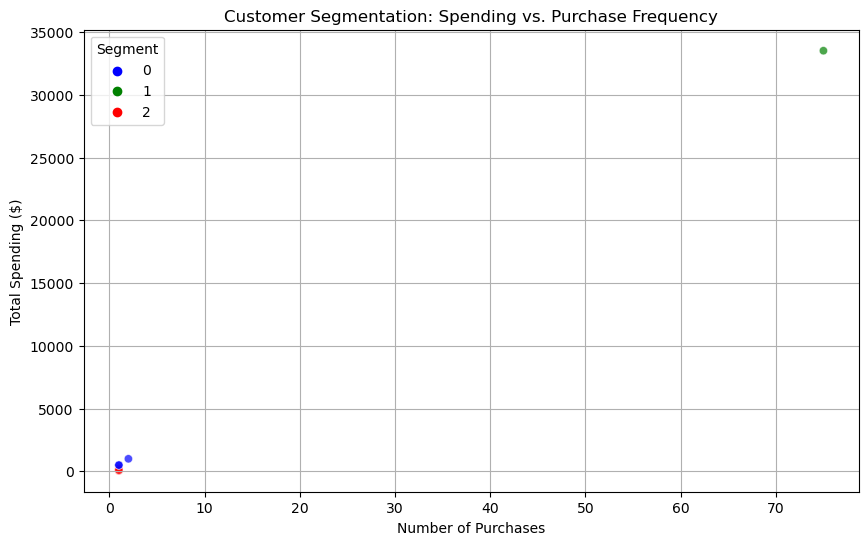

In [11]:
# Define colors for clusters
colors = {0: "blue", 1: "green", 2: "red"}

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_data["num_purchases"],
    y=customer_data["total_spent"],
    hue=customer_data["segment"],
    palette=colors,
    alpha=0.7
)

# Formatting
plt.xlabel("Number of Purchases")
plt.ylabel("Total Spending ($)")
plt.title("Customer Segmentation: Spending vs. Purchase Frequency")
plt.legend(title="Segment")
plt.grid(True)
plt.show()